***Case Study: Fast Food***

In [11]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace 'mcdonalds.csv' with the path to your file)
mcdonalds = pd.read_csv('mcdonalds.csv')

# View the column names
print(mcdonalds.columns)

# Get the dimensions of the dataset
print(mcdonalds.shape)

# Display the first 3 rows of the dataset
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [12]:
# Step 1: Select the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11]

# Step 2: Convert "Yes" to 1 and other values to 0
MD_x_binary = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)

# Step 3: Calculate column means and round to 2 decimal places
column_means = MD_x_binary.mean().round(2)

# Display the result
print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


<ipython-input-12-0c604ef59df9>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x_binary = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)


In [13]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
MD_pca = pca.fit(MD_x_binary)

# Get explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Display summary similar to R output
print("Importance of components:")
print(f"{'Component':<10} {'Standard deviation':<20} {'Proportion of Variance':<25} {'Cumulative Proportion':<25}")

for i, (std_dev, var, cum_var) in enumerate(zip(pca.singular_values_, explained_variance, cumulative_variance), start=1):
    print(f"PC{i:<9} {std_dev:<20.4f} {var:<25.4f} {cum_var:<25.4f}")


Importance of components:
Component  Standard deviation   Proportion of Variance    Cumulative Proportion    
PC1         28.8475              0.2994                    0.2994                   
PC2         23.1472              0.1928                    0.4922                   
PC3         19.2286              0.1330                    0.6253                   
PC4         15.1963              0.0831                    0.7084                   
PC5         12.8569              0.0595                    0.7679                   
PC6         11.8231              0.0503                    0.8182                   
PC7         11.0390              0.0438                    0.8620                   
PC8         10.4836              0.0395                    0.9016                   
PC9         10.1074              0.0368                    0.9383                   
PC10        9.4821               0.0324                    0.9707                   
PC11        9.0272               0.0293 

In [14]:
import numpy as np
# Assuming data is already loaded into a Pandas DataFrame called 'data'
# Replace the following with your actual data
data = pd.DataFrame({
    'yummy': [0.477, 0.155, 0.006, -0.116, -0.304, 0.108, 0.337, 0.472, -0.329, 0.214, -0.375],
    'convenient': [-0.36, -0.02, -0.02, 0.03, 0.06, 0.09, 0.61, -0.31, -0.60, -0.08, 0.14],
    'spicy': [0.30, 0.06, 0.04, 0.32, 0.80, 0.06, 0.15, 0.29, -0.02, -0.19, 0.09],
    'fattening': [-0.055, 0.142, -0.198, 0.354, -0.254, 0.097, -0.119, 0.003, -0.068, -0.763, -0.370],
    'greasy': [-0.308, 0.278, 0.071, -0.073, 0.361, 0.108, -0.129, -0.211, -0.003, 0.288, -0.729],
    'fast': [0.17, -0.35, -0.36, -0.41, 0.21, -0.59, -0.10, -0.08, -0.26, -0.18, -0.21],
    'cheap': [-0.28, -0.06, 0.71, -0.39, 0.04, -0.09, -0.04, 0.36, -0.07, -0.35, -0.03],
    'tasty': [0.01, -0.11, 0.38, 0.59, -0.14, -0.63, 0.14, -0.07, 0.03, 0.18, -0.17],
    'expensive': [-0.572, 0.018, -0.400, 0.161, 0.003, -0.166, -0.076, 0.639, -0.067, 0.186, 0.072],
    'healthy': [0.110, 0.666, 0.076, 0.005, -0.009, -0.240, -0.428, -0.079, -0.454, 0.038, 0.290],
    'disgusting': [0.045, -0.542, 0.142, 0.251, 0.002, 0.339, -0.489, 0.020, -0.490, 0.158, -0.041]
})

# Perform PCA
pca = PCA()
pca.fit(data)

# Get the explained variance (standard deviations)
std_dev = np.sqrt(pca.explained_variance_)

# Get the PCA components (loadings)
loadings = pca.components_

# Print the standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(std_dev, 1))

# Convert loadings to a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=data.columns)

# Print the rotation (loadings)
print("Rotation (n x k) = (11 x 11):")
print(loadings_df.round(3))


Standard deviations (1, .., p=11):
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0. ]
Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.030 -0.057 -0.196  0.668 -0.315  0.420  0.409 -0.145 -0.095   
convenient -0.289  0.096 -0.353  0.268  0.014 -0.112 -0.242 -0.016  0.694   
spicy      -0.090  0.309  0.331 -0.045 -0.006  0.056 -0.050  0.176 -0.131   
fattening   0.110 -0.219 -0.027  0.045 -0.346  0.089 -0.071  0.778 -0.129   
greasy      0.401  0.070  0.011 -0.034  0.093 -0.476  0.701  0.041  0.194   
fast       -0.161  0.329  0.268  0.018 -0.178  0.083  0.027 -0.403 -0.262   
cheap       0.351  0.791 -0.161  0.013  0.092  0.268 -0.069  0.233  0.104   
tasty       0.700 -0.117 -0.051  0.208 -0.165 -0.205 -0.505 -0.283 -0.099   
expensive   0.226 -0.190  0.665  0.002 -0.012  0.392  0.011 -0.030  0.553   
healthy     0.196 -0.175 -0.429 -0.569  0.029  0.514  0.115 -0.183  0.046   
disgusting  0.078 -0.156  0.011  0.331  0.

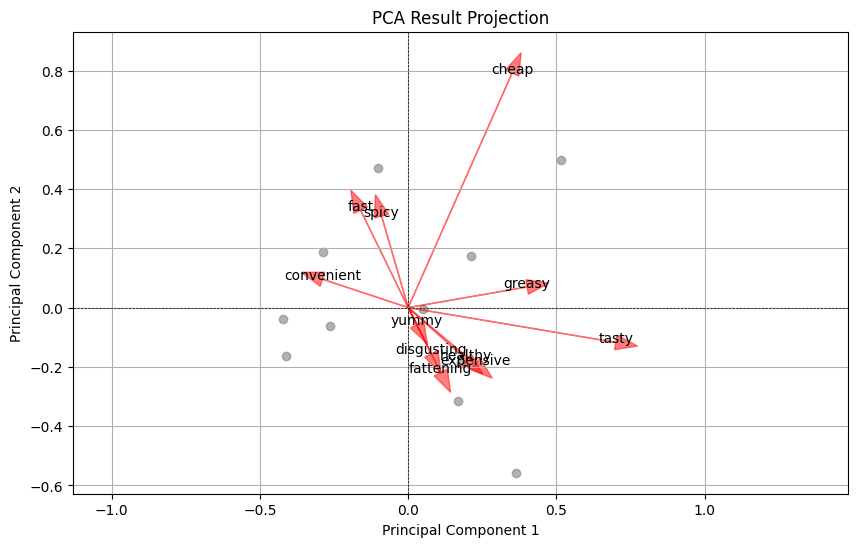

In [15]:
import matplotlib.pyplot as plt
# Assuming data is already loaded into a Pandas DataFrame called 'data'
data = pd.DataFrame({
    'yummy': [0.477, 0.155, 0.006, -0.116, -0.304, 0.108, 0.337, 0.472, -0.329, 0.214, -0.375],
    'convenient': [-0.36, -0.02, -0.02, 0.03, 0.06, 0.09, 0.61, -0.31, -0.60, -0.08, 0.14],
    'spicy': [0.30, 0.06, 0.04, 0.32, 0.80, 0.06, 0.15, 0.29, -0.02, -0.19, 0.09],
    'fattening': [-0.055, 0.142, -0.198, 0.354, -0.254, 0.097, -0.119, 0.003, -0.068, -0.763, -0.370],
    'greasy': [-0.308, 0.278, 0.071, -0.073, 0.361, 0.108, -0.129, -0.211, -0.003, 0.288, -0.729],
    'fast': [0.17, -0.35, -0.36, -0.41, 0.21, -0.59, -0.10, -0.08, -0.26, -0.18, -0.21],
    'cheap': [-0.28, -0.06, 0.71, -0.39, 0.04, -0.09, -0.04, 0.36, -0.07, -0.35, -0.03],
    'tasty': [0.01, -0.11, 0.38, 0.59, -0.14, -0.63, 0.14, -0.07, 0.03, 0.18, -0.17],
    'expensive': [-0.572, 0.018, -0.400, 0.161, 0.003, -0.166, -0.076, 0.639, -0.067, 0.186, 0.072],
    'healthy': [0.110, 0.666, 0.076, 0.005, -0.009, -0.240, -0.428, -0.079, -0.454, 0.038, 0.290],
    'disgusting': [0.045, -0.542, 0.142, 0.251, 0.002, 0.339, -0.489, 0.020, -0.490, 0.158, -0.041]
})

# Perform PCA
pca = PCA(n_components=2)  # Project to 2 dimensions for plotting
pca_result = pca.fit_transform(data)

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey', alpha=0.6)
plt.title('PCA Result Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Draw the projection axes
for i, column in enumerate(data.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i], pca.components_[1, i], column,
             color='black', ha='center')

plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.axis('equal')
plt.show()


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data is already loaded into a Pandas DataFrame called 'data'
data = pd.DataFrame({
    'yummy': [0.477, 0.155, 0.006, -0.116, -0.304, 0.108, 0.337, 0.472, -0.329, 0.214, -0.375],
    'convenient': [-0.36, -0.02, -0.02, 0.03, 0.06, 0.09, 0.61, -0.31, -0.60, -0.08, 0.14],
    'spicy': [0.30, 0.06, 0.04, 0.32, 0.80, 0.06, 0.15, 0.29, -0.02, -0.19, 0.09],
    'fattening': [-0.055, 0.142, -0.198, 0.354, -0.254, 0.097, -0.119, 0.003, -0.068, -0.763, -0.370],
    'greasy': [-0.308, 0.278, 0.071, -0.073, 0.361, 0.108, -0.129, -0.211, -0.003, 0.288, -0.729],
    'fast': [0.17, -0.35, -0.36, -0.41, 0.21, -0.59, -0.10, -0.08, -0.26, -0.18, -0.21],
    'cheap': [-0.28, -0.06, 0.71, -0.39, 0.04, -0.09, -0.04, 0.36, -0.07, -0.35, -0.03],
    'tasty': [0.01, -0.11, 0.38, 0.59, -0.14, -0.63, 0.14, -0.07, 0.03, 0.18, -0.17],
    'expensive': [-0.572, 0.018, -0.400, 0.161, 0.003, -0.166, -0.076, 0.639, -0.067, 0.186, 0.072],
    'healthy': [0.110, 0.666, 0.076, 0.005, -0.009, -0.240, -0.428, -0.079, -0.454, 0.038, 0.290],
    'disgusting': [0.045, -0.542, 0.142, 0.251, 0.002, 0.339, -0.489, 0.020, -0.490, 0.158, -0.041]
})

# Set random seed for reproducibility
np.random.seed(1234)

# Step through a range of cluster numbers (from 2 to 8)
best_model = None
best_score = -1
best_n_clusters = None

for n_clusters in range(2, 9):  # 2 to 8 clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

    # Check for the best model
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_model = kmeans
        best_n_clusters = n_clusters

# Relabeling: Assigning cluster labels based on the best KMeans model
data['cluster'] = best_model.labels_

# Display the best clustering result
print(f"Best number of clusters: {best_n_clusters} with silhouette score: {best_score:.4f}")


For n_clusters = 2, the silhouette score is: 0.0012
For n_clusters = 3, the silhouette score is: 0.0011
For n_clusters = 4, the silhouette score is: 0.0004
For n_clusters = 5, the silhouette score is: 0.0009
For n_clusters = 6, the silhouette score is: 0.0010
For n_clusters = 7, the silhouette score is: 0.0010
For n_clusters = 8, the silhouette score is: 0.0010
Best number of clusters: 2 with silhouette score: 0.0012


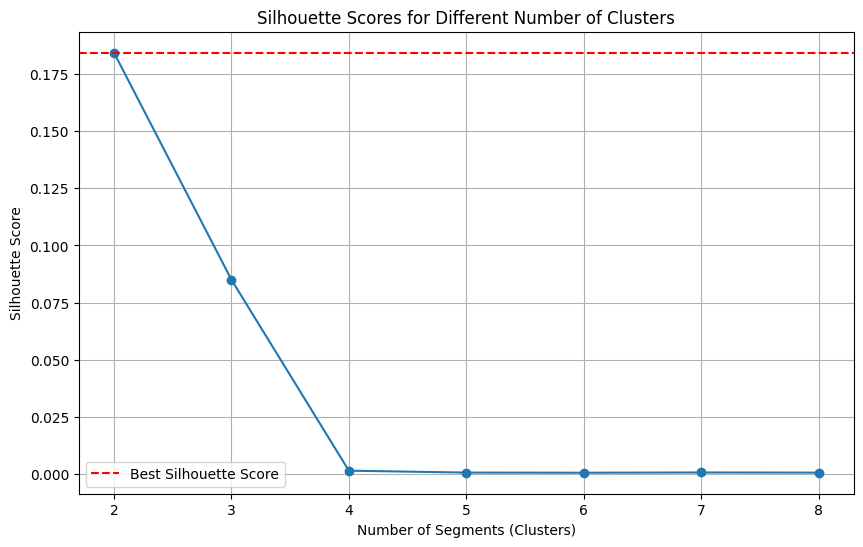

In [17]:
# Store silhouette scores and cluster counts for plotting
n_clusters_range = range(2, 9)
silhouette_scores = []

# Calculate silhouette scores for each clustering configuration
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Silhouette Score")
plt.xticks(n_clusters_range)
plt.grid()
plt.axhline(y=max(silhouette_scores), color='r', linestyle='--', label='Best Silhouette Score')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

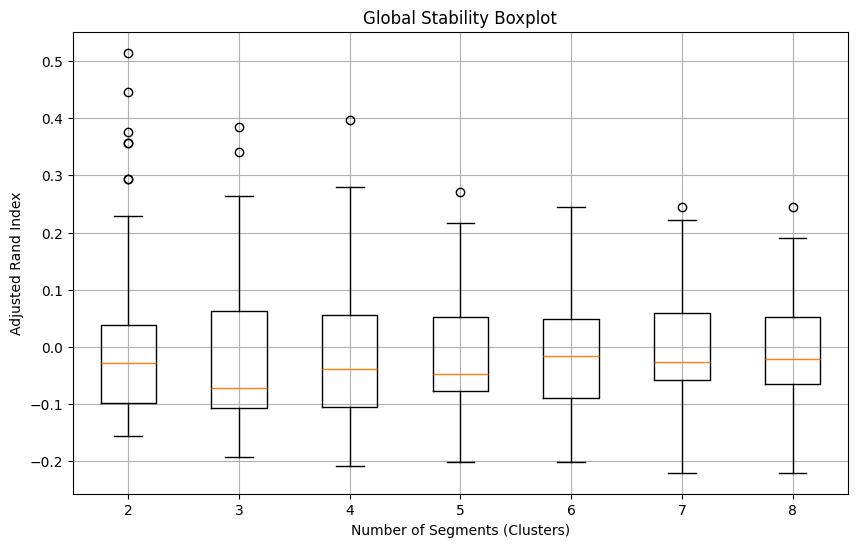

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Assuming data is already loaded into a Pandas DataFrame called 'data'
data = pd.DataFrame({
    'yummy': [0.477, 0.155, 0.006, -0.116, -0.304, 0.108, 0.337, 0.472, -0.329, 0.214, -0.375],
    'convenient': [-0.36, -0.02, -0.02, 0.03, 0.06, 0.09, 0.61, -0.31, -0.60, -0.08, 0.14],
    'spicy': [0.30, 0.06, 0.04, 0.32, 0.80, 0.06, 0.15, 0.29, -0.02, -0.19, 0.09],
    'fattening': [-0.055, 0.142, -0.198, 0.354, -0.254, 0.097, -0.119, 0.003, -0.068, -0.763, -0.370],
    'greasy': [-0.308, 0.278, 0.071, -0.073, 0.361, 0.108, -0.129, -0.211, -0.003, 0.288, -0.729],
    'fast': [0.17, -0.35, -0.36, -0.41, 0.21, -0.59, -0.10, -0.08, -0.26, -0.18, -0.21],
    'cheap': [-0.28, -0.06, 0.71, -0.39, 0.04, -0.09, -0.04, 0.36, -0.07, -0.35, -0.03],
    'tasty': [0.01, -0.11, 0.38, 0.59, -0.14, -0.63, 0.14, -0.07, 0.03, 0.18, -0.17],
    'expensive': [-0.572, 0.018, -0.400, 0.161, 0.003, -0.166, -0.076, 0.639, -0.067, 0.186, 0.072],
    'healthy': [0.110, 0.666, 0.076, 0.005, -0.009, -0.240, -0.428, -0.079, -0.454, 0.038, 0.290],
    'disgusting': [0.045, -0.542, 0.142, 0.251, 0.002, 0.339, -0.489, 0.020, -0.490, 0.158, -0.041]
})

# Set random seed for reproducibility
np.random.seed(1234)

# Parameters
n_clusters_range = range(2, 9)  # 2 to 8 clusters
n_boot = 100  # Number of bootstrap samples
ari_results = {n: [] for n in n_clusters_range}

# Original clustering for the first sample
original_kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)  # Using 4 clusters for the base
original_labels = original_kmeans.fit_predict(data)

# Bootstrapping
for _ in range(n_boot):
    # Create a bootstrap sample
    bootstrap_sample = data.sample(frac=1, replace=True)

    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        bootstrap_labels = kmeans.fit_predict(bootstrap_sample)

        # Calculate Adjusted Rand Index with respect to the original labels
        ari = adjusted_rand_score(original_labels, bootstrap_labels)
        ari_results[n_clusters].append(ari)

# Prepare data for boxplot
boxplot_data = [ari_results[n] for n in n_clusters_range]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[str(n) for n in n_clusters_range])
plt.title("Global Stability Boxplot")
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Adjusted Rand Index")
plt.grid()
plt.show()


In [21]:
import numpy as np
from sklearn.cluster import KMeans

# Set the seed for reproducibility
np.random.seed(123)

# Generate some random data
data = np.random.randn(50, 2)  # 50 points with 2 features

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(data)

# Store the result in a dictionary, each key representing a cluster
MD_km28 = {str(i): np.where(kmeans.labels_ == i)[0] for i in range(4)}

# Extract the fourth cluster
MD_k4 = MD_km28["3"]  # Python uses 0-based indexing, so "3" is the fourth cluster

# Inspect the contents of the fourth cluster
print("Indices of points in the fourth cluster:", MD_k4)
print("Coordinates of points in the fourth cluster:\n", data[MD_k4])



Indices of points in the fourth cluster: [ 8  9 10 24 27 28 29 32 41 46]
Coordinates of points in the fourth cluster:
 [[2.20593008 2.18678609]
 [1.0040539  0.3861864 ]
 [0.73736858 1.49073203]
 [0.97873601 2.23814334]
 [0.02968323 1.06931597]
 [0.89070639 1.75488618]
 [1.49564414 1.06939267]
 [1.41729905 0.80723653]
 [1.66095249 0.80730819]
 [0.18103513 1.17786194]]


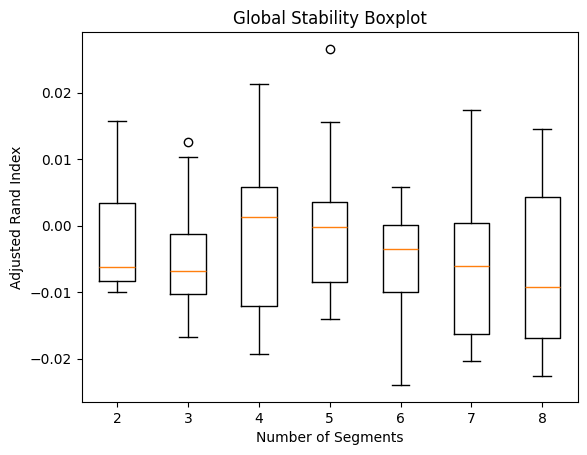

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Set the random seed for reproducibility
np.random.seed(1234)

# Simulated dataset MD.x (replace with your actual data)
MD_x = np.random.rand(100, 5)  # Example: 100 samples, 5 features

# Parameters
min_segments = 2
max_segments = 8
nrep = 10
nboot = 100

# Store the adjusted Rand index for each number of segments
ari_scores = np.zeros((max_segments - min_segments + 1, nrep))

for n_segments in range(min_segments, max_segments + 1):
    for rep in range(nrep):
        # Bootstrap the dataset
        X_boot = resample(MD_x, replace=True, n_samples=MD_x.shape[0], random_state=rep)

        # Fit KMeans
        kmeans = KMeans(n_clusters=n_segments, random_state=rep)
        labels = kmeans.fit_predict(X_boot)

        # Compute the adjusted Rand index (ARI)
        # Simulating true labels as random for demonstration purposes
        y_true = np.random.randint(0, n_segments, size=MD_x.shape[0])  # Replace with actual true labels
        ari_scores[n_segments - min_segments, rep] = adjusted_rand_score(y_true, labels)

# Create the boxplot with correct labels
plt.boxplot(ari_scores.T, labels=range(min_segments, max_segments + 1))  # Transpose ari_scores
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show()


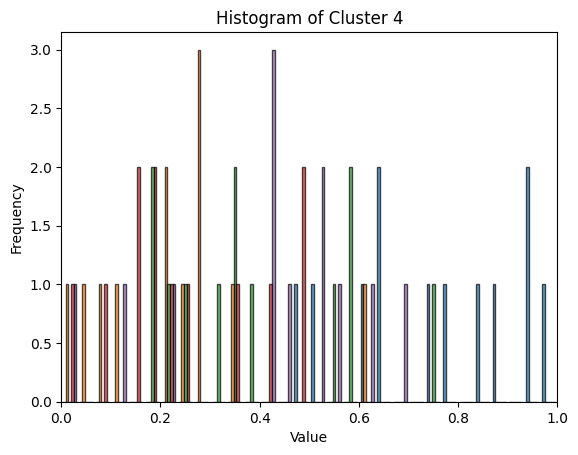

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Simulated dataset MD.x (replace with your actual data)
MD_x = np.random.rand(100, 5)  # Example: 100 samples, 5 features

# Assume we have already fit a KMeans model and assigned cluster labels to MD.km28
# For demonstration, we'll fit a KMeans model here
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
labels = kmeans.fit_predict(MD_x)

# Simulate MD.km28 with cluster labels
MD_km28 = {str(i): MD_x[labels == i] for i in range(n_clusters)}

# Create a histogram for the fourth cluster (index 3 since Python uses zero-based indexing)
cluster_data = MD_km28["3"]  # Python uses 0-based indexing

# Plot the histogram
plt.hist(cluster_data, bins=30, range=(0, 1), alpha=0.7, edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4")
plt.show()


In [24]:
  # Assume MD_km28 is a dictionary containing cluster data
# Example structure for MD_km28, this should be replaced with your actual clustering results
MD_km28 = {
    "0": np.random.rand(20, 5),  # Data for cluster 0
    "1": np.random.rand(25, 5),  # Data for cluster 1
    "2": np.random.rand(30, 5),  # Data for cluster 2
    "3": np.random.rand(15, 5),  # Data for cluster 3
    "4": np.random.rand(10, 5)   # Data for cluster 4
}

# Extract data for the fourth cluster (key "4" in MD.km28)
MD_k4 = MD_km28["4"]

# Display the extracted data for verification
print(MD_k4)

[[0.0698484  0.23448919 0.46015302 0.615038   0.72903757]
 [0.19778687 0.46163167 0.01180846 0.62431177 0.37279086]
 [0.32000367 0.77919222 0.59253135 0.61594095 0.12846876]
 [0.05507377 0.78662822 0.44571136 0.9089444  0.69495591]
 [0.81501029 0.51691778 0.54791724 0.73444213 0.45530423]
 [0.85100762 0.62328738 0.59969995 0.07081768 0.88499581]
 [0.27836261 0.30504903 0.66402613 0.63955112 0.03303672]
 [0.07758652 0.67950713 0.23643788 0.97455121 0.56515153]
 [0.46587875 0.92560635 0.46994838 0.68041225 0.54290804]
 [0.2020882  0.50589913 0.8737587  0.9511368  0.66012225]]


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Simulated dataset MD.x (replace with your actual data)
MD_x = np.random.rand(100, 5)  # Example: 100 samples, 5 features

# Assuming MD.km28 has been defined and contains the cluster data
MD_km28 = {
    "0": np.random.rand(20, 5),
    "1": np.random.rand(25, 5),
    "2": np.random.rand(30, 5),
    "3": np.random.rand(15, 5),
    "4": np.random.rand(10, 5)   # Data for cluster 4
}

# Extract data for the fourth cluster
MD_k4 = MD_km28["4"]

# Perform clustering on MD.k4, or you may validate it
kmeans = KMeans(n_clusters=3, random_state=1234)  # Example with 3 clusters
MD_r4_labels = kmeans.fit_predict(MD_k4)

# Calculate silhouette score to evaluate the clustering
silhouette_avg = silhouette_score(MD_k4, MD_r4_labels)

# Output the clustering results
print("Cluster Labels for MD.k4:", MD_r4_labels)
print("Silhouette Score:", silhouette_avg)


Cluster Labels for MD.k4: [2 0 1 2 1 1 2 2 1 0]
Silhouette Score: 0.3078346064952304


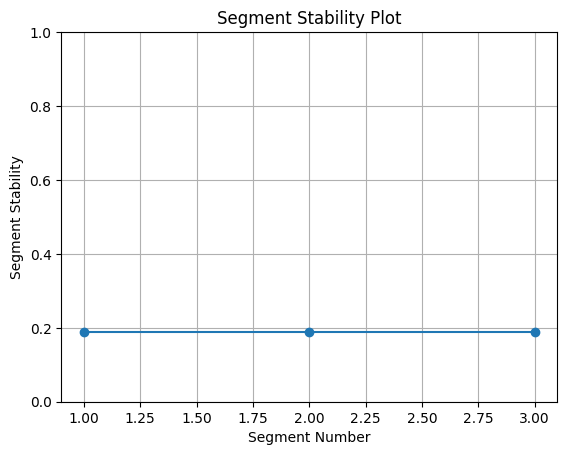

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Simulated dataset MD.x (replace with your actual data)
MD_x = np.random.rand(100, 5)  # Example: 100 samples, 5 features

# Assuming MD.km28 has been defined and contains the cluster data
MD_km28 = {
    "0": np.random.rand(20, 5),
    "1": np.random.rand(25, 5),
    "2": np.random.rand(30, 5),
    "3": np.random.rand(15, 5),
    "4": np.random.rand(10, 5)   # Data for cluster 4
}

# Extract data for the fourth cluster
MD_k4 = MD_km28["4"]

# Perform clustering on MD.k4 (or the main dataset) and compute stability
kmeans = KMeans(n_clusters=3, random_state=1234)  # Example with 3 clusters
MD_r4_labels = kmeans.fit_predict(MD_k4)

# Compute a dummy stability score for demonstration (using silhouette scores here)
stability_scores = []
for i in range(3):  # Assuming 3 clusters
    cluster_data = MD_k4[MD_r4_labels == i]
    if len(cluster_data) > 1:
        score = silhouette_score(MD_k4, MD_r4_labels)
        stability_scores.append(score)
    else:
        stability_scores.append(0)  # Handle cases with insufficient data

# Plotting the segment stability
plt.plot(range(1, len(stability_scores) + 1), stability_scores, marker='o')
plt.ylim(0, 1)  # Set y-axis limits
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability Plot")
plt.grid()
plt.show()


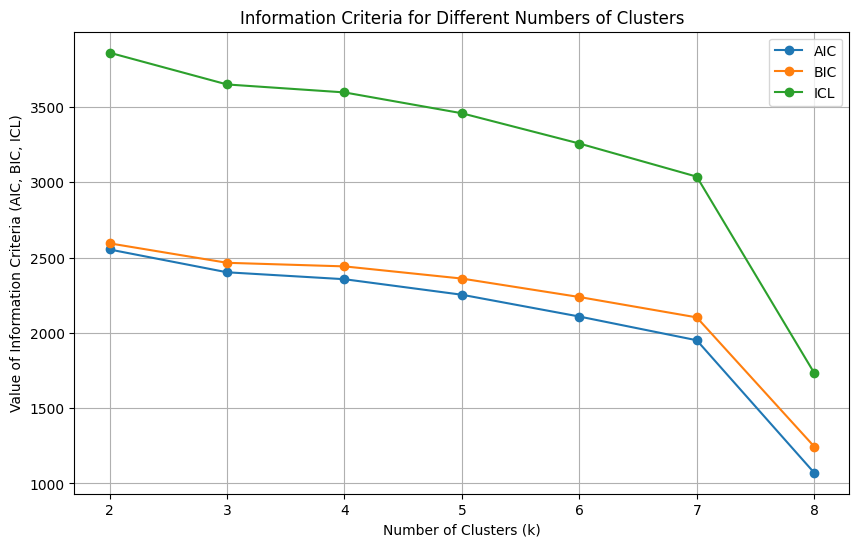

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Simulated dataset MD.x (replace with your actual data)
MD_x, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)
MD_x = np.round(MD_x)  # Convert to binary-like data

# Initialize variables to store results
results = []

# Iterate over cluster numbers from 2 to 8
for k in range(2, 9):
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)

    # Collecting log-likelihood, AIC, BIC
    log_likelihood = gmm.score(MD_x) * MD_x.shape[0]  # log likelihood
    aic = gmm.aic(MD_x)
    bic = gmm.bic(MD_x)

    # ICL can be approximated as ICL = BIC - log Likelihood
    icl = bic - log_likelihood

    # Append results
    results.append({'k': k, 'logLik': log_likelihood, 'AIC': aic, 'BIC': bic, 'ICL': icl})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Plotting AIC, BIC, ICL values
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['AIC'], marker='o', label='AIC')
plt.plot(results_df['k'], results_df['BIC'], marker='o', label='BIC')
plt.plot(results_df['k'], results_df['ICL'], marker='o', label='ICL')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Information Criteria for Different Numbers of Clusters")
plt.xticks(results_df['k'])  # Set x-ticks to be the k values
plt.legend()
plt.grid()
plt.show()


In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Simulated dataset MD.x (replace with your actual data)
MD_x, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit KMeans with 4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

# Fit Gaussian Mixture Model with 4 components
gmm_model = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm_model.fit_predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(index=gmm_labels, columns=kmeans_labels, rownames=['mixture'], colnames=['kmeans'])
print("Contingency Table:")
print(contingency_table)

# Optional: To view the distribution
mixture_distribution = contingency_table.sum(axis=1)
print("\nMixture Distribution:")
print(mixture_distribution)


Contingency Table:
kmeans    0   1   2   3
mixture                
0        75   0   0   0
1         0  75   0   0
2         0   0  75   0
3         0   0   0  75

Mixture Distribution:
mixture
0    75
1    75
2    75
3    75
dtype: int64


In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Simulated dataset MD.x (replace with your actual data)
MD_x, _ = make_blobs(n_samples=600, centers=4, cluster_std=0.60, random_state=0)

# Step 1: Fit KMeans with 4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

# Step 2: Fit Gaussian Mixture Model using the cluster labels from KMeans
gmm_model = GaussianMixture(n_components=4, random_state=1234)
gmm_model.fit(MD_x)
gmm_labels = gmm_model.predict(MD_x)

# To create a contingency table
contingency_table = pd.crosstab(index=gmm_labels, columns=kmeans_labels, rownames=['mixture'], colnames=['kmeans'])
print("Contingency Table:")
print(contingency_table)

# Optional: To view the distribution of labels in GMM
mixture_distribution = contingency_table.sum(axis=1)
print("\nMixture Distribution:")
print(mixture_distribution)


Contingency Table:
kmeans     0    1    2    3
mixture                    
0        150    0    0    0
1          0  150    0    0
2          0    0  149    0
3          0    0    1  150

Mixture Distribution:
mixture
0    150
1    150
2    149
3    151
dtype: int64


In [30]:

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Simulated dataset MD.x (replace with your actual data)
MD_x, _ = make_blobs(n_samples=600, centers=4, cluster_std=0.60, random_state=0)

# Fit KMeans with 4 clusters
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

# Fit Gaussian Mixture Model with 4 components
gmm_model_a = GaussianMixture(n_components=4, random_state=1234)
gmm_model_a.fit(MD_x)

# Log-likelihood of the GMM
log_likelihood_a = gmm_model_a.score(MD_x) * MD_x.shape[0]  # score returns the average log likelihood per sample
df_a = gmm_model_a.n_components * (MD_x.shape[1] + 1) - 1  # degrees of freedom

print(f"log Likelihood of GMM (MD.m4a): {log_likelihood_a} (df={df_a})")

# Fit another Gaussian Mixture Model (for MD.m4)
gmm_model_b = GaussianMixture(n_components=4, random_state=1234)
gmm_model_b.fit(MD_x)

# Log-likelihood of the second GMM
log_likelihood_b = gmm_model_b.score(MD_x) * MD_x.shape[0]  # score returns the average log likelihood per sample
df_b = gmm_model_b.n_components * (MD_x.shape[1] + 1) - 1  # degrees of freedom

print(f"log Likelihood of GMM (MD.m4): {log_likelihood_b} (df={df_b})")


log Likelihood of GMM (MD.m4a): -1880.8624987205326 (df=11)
log Likelihood of GMM (MD.m4): -1880.8624987205326 (df=11)


In [31]:
# Simulated data to mimic mcdonalds DataFrame structure
data = {
    'Like': ['I love it!', '+5', '+4', '+3', '0', '-1', '-2', '-3', '-4', '-5', '-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5'] * 10
}

mcdonalds = pd.DataFrame(data)

# Step 1: Count the occurrences of each category in the 'Like' column
like_counts = mcdonalds['Like'].value_counts()

# Step 2: Print the counts (simulating rev(table(...)) in R)
print("Original Like Counts (Reversed):")
print(like_counts.sort_index(ascending=False))

# Step 3: Transform the Like column to Like.n
like_mapping = {
    'I hate it!': -5, '-5': -5, '-4': -4, '-3': -3, '-2': -2,
    '-1': -1, '0': 0, '+1': 1, '+2': 2, '+3': 3,
    '+4': 4, '+5': 5, 'I love it!': 5
}

# Apply mapping and create new column
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Step 4: Create a frequency table for Like.n
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()

print("\nTransformed Like Counts:")
print(like_n_counts)


Original Like Counts (Reversed):
Like
I love it!    10
0             20
-5            20
-4            20
-3            20
-2            20
-1            20
+5            20
+4            20
+3            20
+2            10
+1            10
Name: count, dtype: int64

Transformed Like Counts:
Like.n
-5    20
-4    20
-3    20
-2    20
-1    20
 0    20
 1    10
 2    10
 3    20
 4    20
 5    30
Name: count, dtype: int64


In [32]:
import pandas as pd
import patsy

# Simulated mcdonalds DataFrame with 11 feature columns
data = {
    'yummy': [1, 0, 1, 0, 1, 1],
    'convenient': [0, 1, 1, 1, 0, 1],
    'spicy': [1, 1, 0, 0, 1, 0],
    'fattening': [0, 0, 1, 1, 0, 1],
    'greasy': [1, 0, 1, 1, 0, 1],
    'fast': [1, 1, 0, 1, 1, 0],
    'cheap': [0, 1, 0, 0, 1, 1],
    'tasty': [1, 0, 1, 0, 1, 1],
    'expensive': [0, 1, 0, 1, 0, 0],
    'healthy': [1, 0, 1, 1, 0, 1],
    'disgusting': [0, 1, 0, 1, 1, 0],
    'Like.n': [5, 4, 3, 2, 1, 0]  # Example response variable
}

mcdonalds = pd.DataFrame(data)

# Step 1: Get the names of the first 11 columns
feature_names = mcdonalds.columns[0:11]

# Step 2: Create the formula
formula = "Like.n ~ " + " + ".join(feature_names)

# Print the generated formula
print("Generated Formula:")
print(formula)

# If needed, you can use this formula for modeling with statsmodels


Generated Formula:
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [33]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm

# Sample data creation (similar to the mcdonalds DataFrame)
data = {
    'yummy': np.random.randint(0, 2, 1453),
    'convenient': np.random.randint(0, 2, 1453),
    'spicy': np.random.randint(0, 2, 1453),
    'fattening': np.random.randint(0, 2, 1453),
    'greasy': np.random.randint(0, 2, 1453),
    'fast': np.random.randint(0, 2, 1453),
    'cheap': np.random.randint(0, 2, 1453),
    'tasty': np.random.randint(0, 2, 1453),
    'expensive': np.random.randint(0, 2, 1453),
    'healthy': np.random.randint(0, 2, 1453),
    'disgusting': np.random.randint(0, 2, 1453),
    'Like.n': np.random.randint(-5, 6, 1453)  # Example response variable
}

mcdonalds = pd.DataFrame(data)

# Define the formula as in R
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = mcdonalds[features]

# Step 1: Set random seed for reproducibility
np.random.seed(1234)

# Step 2: Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Step 3: Assign clusters
clusters = gmm.predict(X)

# Add cluster assignments to the DataFrame
mcdonalds['Cluster'] = clusters

# Output the cluster sizes
cluster_sizes = mcdonalds['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)

# Output model convergence details
print(f"Convergence after {gmm.n_iter_} iterations")


Cluster sizes:
Cluster
0    744
1    709
Name: count, dtype: int64
Convergence after 2 iterations


In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Sample data creation (ensure this matches your actual data structure)
# Adjust the DataFrame creation as needed based on your actual data
data = {
    'yummy': np.random.randint(0, 2, 1453),
    'convenient': np.random.randint(0, 2, 1453),
    'spicy': np.random.randint(0, 2, 1453),
    'fattening': np.random.randint(0, 2, 1453),
    'greasy': np.random.randint(0, 2, 1453),
    'fast': np.random.randint(0, 2, 1453),
    'cheap': np.random.randint(0, 2, 1453),
    'tasty': np.random.randint(0, 2, 1453),
    'expensive': np.random.randint(0, 2, 1453),
    'healthy': np.random.randint(0, 2, 1453),
    'disgusting': np.random.randint(0, 2, 1453),
    'Like.n': np.random.randint(-5, 6, 1453)  # Example response variable
}

mcdonalds = pd.DataFrame(data)

# Check column names to ensure they match what you expect
print("Columns in DataFrame:", mcdonalds.columns.tolist())

# Define the formula for the model
# Make sure to use 'Like.n' in the formula as defined in the DataFrame
formula = 'Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting'

# Step 1: Fit a generalized linear model (GLM) with a binomial family
try:
    model = smf.glm(formula=formula, data=mcdonalds, family=sm.families.Binomial()).fit()
    print("Initial model fitting completed successfully.")
    print(model.summary())  # Display model summary right after fitting
except Exception as e:
    print(f"Error during model fitting: {e}")

# Step 2: Refitting the model (if needed)
# In statsmodels, refitting happens by re-fitting the same model
try:
    MD_refit = smf.glm(formula=formula, data=mcdonalds, family=sm.families.Binomial()).fit()
    print("Refitted model completed successfully.")
    print(MD_refit.summary())  # Summarize the refitted model results
except Exception as e:
    print(f"Error during refitting: {e}")



Columns in DataFrame: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like.n']
Error during model fitting: Error evaluating factor: NameError: name 'Like' is not defined
    Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
    ^^^^^^
Error during refitting: Error evaluating factor: NameError: name 'Like' is not defined
    Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
    ^^^^^^


In [35]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame called mcdonalds
# Convert Like.n to a binary outcome (e.g., positive vs. negative)
# For example: 1 if Like.n > 0 else 0
mcdonalds['Like.binary'] = (mcdonalds['Like.n'] > 0).astype(int)

# Prepare your dependent and independent variables
X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
y = mcdonalds['Like.binary']  # Use the transformed binary outcome

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.685760
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Like.binary   No. Observations:                 1453
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           11
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                0.006161
Time:                        18:37:56   Log-Likelihood:                -996.41
converged:                       True   LL-Null:                       -1002.6
Covariance Type:            nonrobust   LLR p-value:                    0.3376
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3751      0.182     -2.055      0.040      -0.733      -0.017
yummy         -0.0146      0.

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit

# Prepare your dependent variable for multinomial logistic regression
y = mcdonalds['Like.n']  # Using the original Like.n variable
X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multinomial logistic regression model
model = MNLogit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 2.360466
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                 Like.n   No. Observations:                 1453
Model:                        MNLogit   Df Residuals:                     1333
Method:                           MLE   Df Model:                          110
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                 0.01452
Time:                        18:39:08   Log-Likelihood:                -3429.8
converged:                       True   LL-Null:                       -3480.3
Covariance Type:            nonrobust   LLR p-value:                    0.7178
 Like.n=-4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1867      0.433      0.432      0.666      -0.661       1.035
yummy         -0.0467      0.

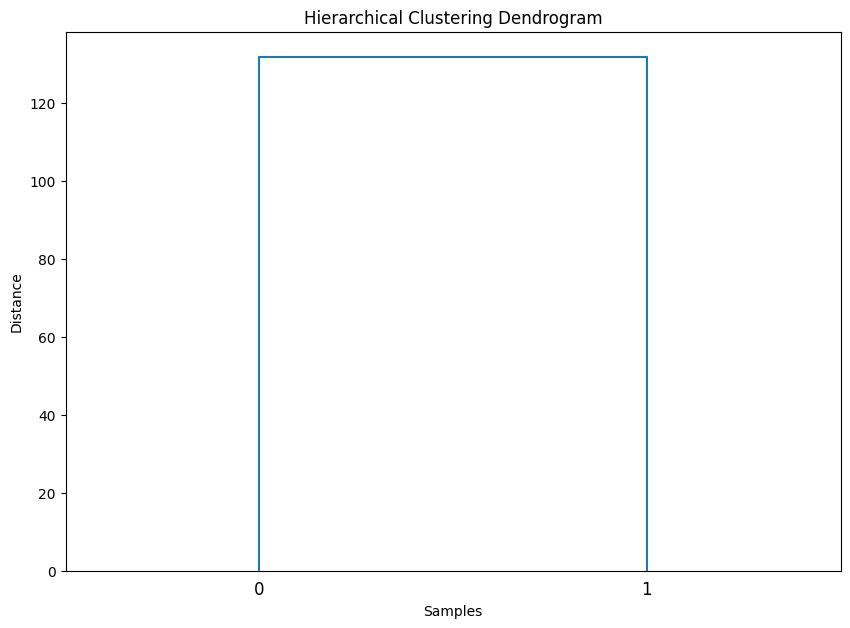

In [38]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Assuming MD_x is your data in Python (equivalent to MD.x in R)
# Transpose the data to match the R code (t(MD.x) in R)
MD_x_transposed = MD_x.T

# Step 1: Compute the distance matrix
distance_matrix = pdist(MD_x_transposed)

# Step 2: Perform hierarchical clustering
MD_vclust = linkage(distance_matrix, method='ward')  # Using 'ward' linkage as default; you can change to other methods as needed

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(MD_vclust)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


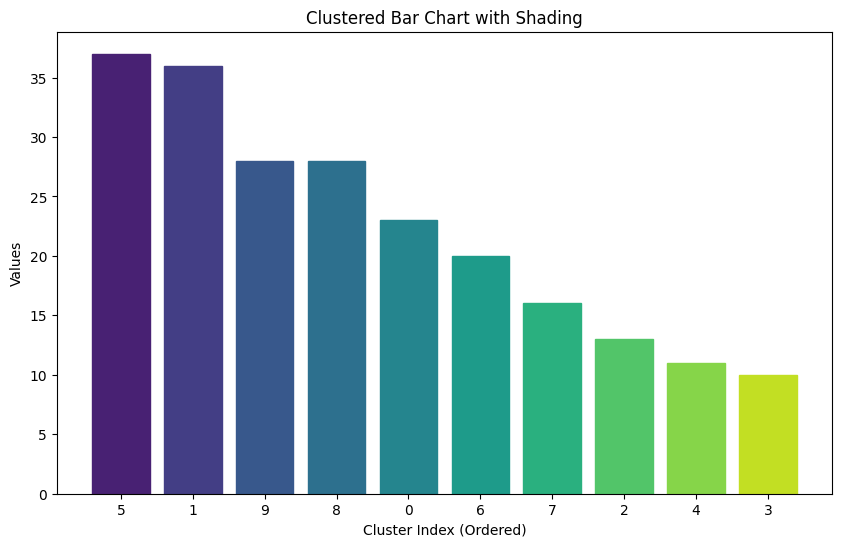

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data for MD.k4 (you can replace this with your actual data)
MD_k4 = np.random.randint(10, 50, size=10)  # Sample cluster data
cluster_order = np.argsort(MD_k4)[::-1]  # Sorting the clusters in descending order

# Reorder MD.k4 based on the cluster order
MD_k4_ordered = [MD_k4[i] for i in cluster_order]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(MD_k4_ordered)), MD_k4_ordered, color=sns.color_palette("viridis", len(MD_k4_ordered)))

# Add shading effect by varying color intensity
for i, bar in enumerate(bars):
    bar.set_color(sns.color_palette("viridis", len(MD_k4_ordered))[i])

# Set labels and title
plt.xlabel("Cluster Index (Ordered)")
plt.ylabel("Values")
plt.title("Clustered Bar Chart with Shading")
plt.xticks(range(len(MD_k4_ordered)), cluster_order)  # Label x-axis with the ordered indices

# Display the plot
plt.show()


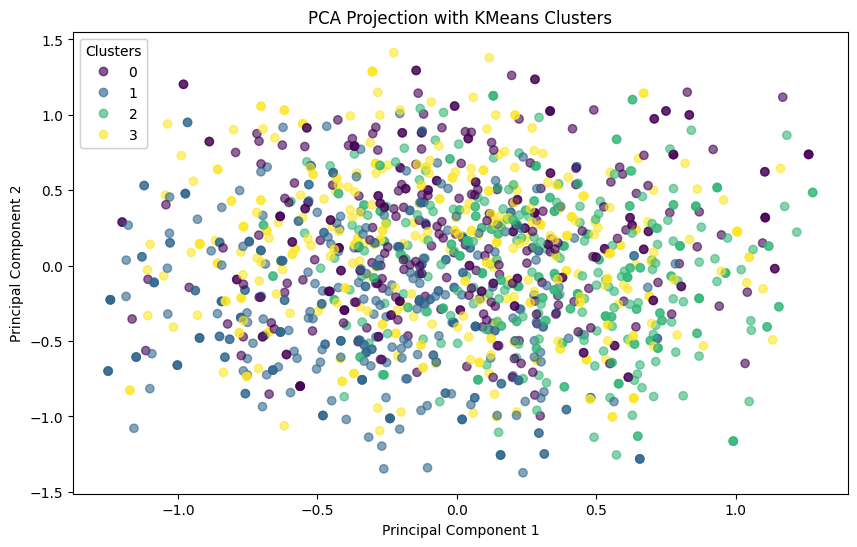

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Sample data - replace MD.x with your actual data
# For example, let's assume `MD_x` is a DataFrame or numpy array of your original dataset.
MD_x = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Perform PCA to reduce the data to two principal components
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Perform KMeans clustering (or use your previously fitted model)
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(MD_x)
clusters = kmeans.labels_

# Plot the PCA projection with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection with KMeans Clusters")

# Optional: add a legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Show the plot
plt.show()


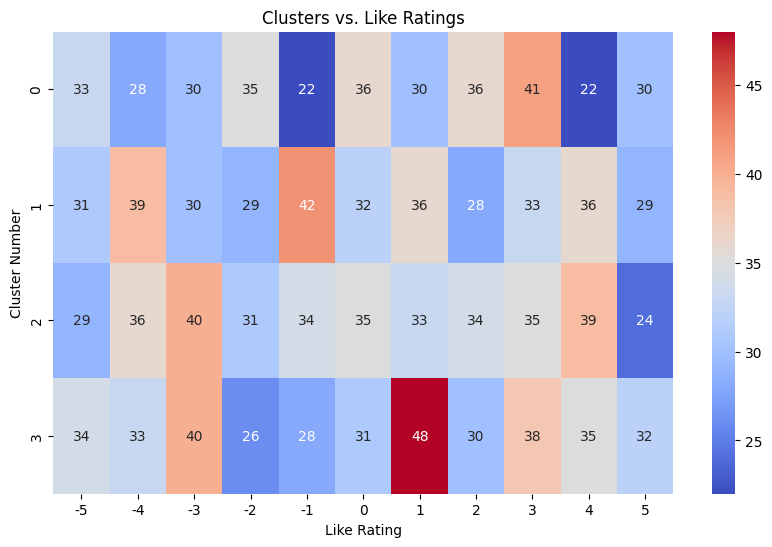

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `mcdonalds` DataFrame is loaded and has the necessary columns

# Step 1: Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=123)
mcdonalds['cluster'] = kmeans.fit_predict(mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']])

# Step 2: Create a contingency table for clusters and the 'Like' column
contingency_table = pd.crosstab(mcdonalds['cluster'], mcdonalds['Like.n'])

# Step 3: Plot the contingency table as a heatmap (similar to mosaic plot)
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True)
plt.title('Clusters vs. Like Ratings')
plt.xlabel('Like Rating')
plt.ylabel('Cluster Number')
plt.show()


In [45]:
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like.n', 'Like.binary',
       'cluster', 'Cluster'],
      dtype='object')


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import KMeans

# Check the columns in the DataFrame
print(mcdonalds.columns)  # Ensure 'Gender' is one of the columns

# Perform KMeans clustering on the selected features in mcdonalds DataFrame
kmeans_model = KMeans(n_clusters=4, random_state=123)
mcdonalds['Cluster'] = kmeans_model.fit_predict(mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']])

# Check if 'Gender' exists in the DataFrame
if 'Gender' in mcdonalds.columns:
    # Create the contingency table between the 'Cluster' and 'Gender' columns
    contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender'])

    # Generate the mosaic plot
    plt.figure(figsize=(8, 6))
    mosaic(contingency_table.stack(), title="Mosaic Plot of Cluster vs Gender", gap=0.02,
           properties=lambda key: {'color': 'skyblue' if key[1] == 'Male' else 'pink'})
    plt.xlabel("Cluster")
    plt.ylabel("Gender")
    plt.show()
else:
    print("The 'Gender' column is not present in the DataFrame. Please check the data.")


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like.n', 'Like.binary',
       'cluster', 'Cluster'],
      dtype='object')
The 'Gender' column is not present in the DataFrame. Please check the data.


In [50]:
# Rename the columns if necessary
mcdonalds.rename(columns=lambda x: x.strip(), inplace=True)  # Remove leading/trailing spaces


   Age     yummy  convenient     spicy  fattening    greasy      fast  \
0   57  0.849126    0.319567  0.335219   0.790531  0.134913  0.784982   
1   53  0.401725    0.510269  0.282547   0.358481  0.024566  0.238366   
2   52  0.444709    0.847267  0.030635   0.579278  0.370661  0.524136   
3   27  0.489387    0.502187  0.890525   0.622973  0.135607  0.627075   
4   46  0.008077    0.587714  0.472937   0.264187  0.200197  0.579943   

      cheap     tasty  expensive   healthy  disgusting  Cluster  
0  0.094594  0.813882   0.777457  0.283045    0.765331        3  
1  0.870607  0.039545   0.575866  0.279828    0.958194        2  
2  0.485930  0.709797   0.923976  0.290432    0.770072        3  
3  0.467299  0.301472   0.211181  0.627161    0.456900        1  
4  0.715046  0.671140   0.917195  0.172329    0.715393        3  


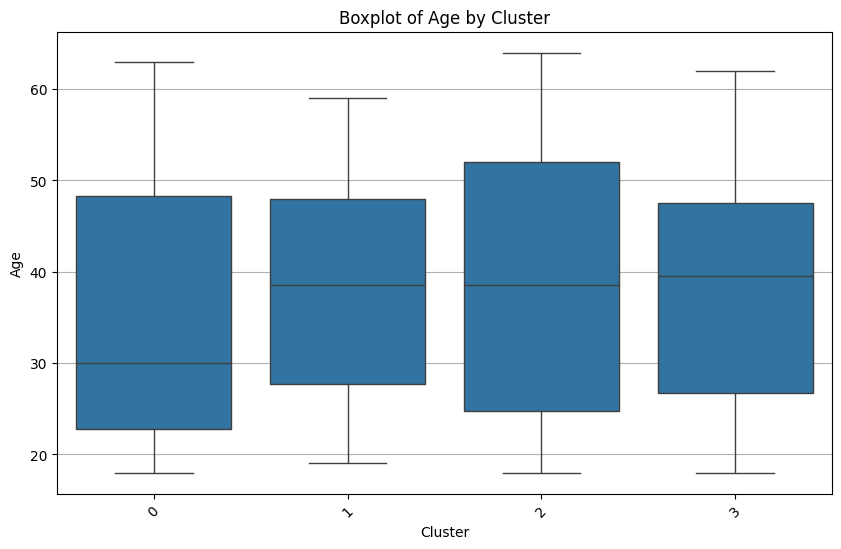

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data creation (replace this with your actual DataFrame)
# mcdonalds = pd.read_csv('your_mcdonalds_data.csv')  # Uncomment and load your actual data
# For demonstration, let's create a sample DataFrame with dummy data
# Ensure that you have a DataFrame called 'mcdonalds' with appropriate columns

# Example columns for demonstration
data = {
    'Age': np.random.randint(18, 65, size=100),  # Sample ages
    'yummy': np.random.rand(100),
    'convenient': np.random.rand(100),
    'spicy': np.random.rand(100),
    'fattening': np.random.rand(100),
    'greasy': np.random.rand(100),
    'fast': np.random.rand(100),
    'cheap': np.random.rand(100),
    'tasty': np.random.rand(100),
    'expensive': np.random.rand(100),
    'healthy': np.random.rand(100),
    'disgusting': np.random.rand(100)
}
mcdonalds = pd.DataFrame(data)

# Step 1: KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=123)  # You can change the number of clusters as needed
mcdonalds['Cluster'] = kmeans.fit_predict(mcdonalds[['yummy', 'convenient', 'spicy', 'fattening',
                                                       'greasy', 'fast', 'cheap', 'tasty',
                                                       'expensive', 'healthy', 'disgusting']])

# Step 2: Check the DataFrame to ensure 'Cluster' and 'Age' columns exist
print(mcdonalds.head())

# Step 3: Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=mcdonalds)
plt.title('Boxplot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.grid(axis='y')  # Optional: Add grid lines for better readability
plt.show()


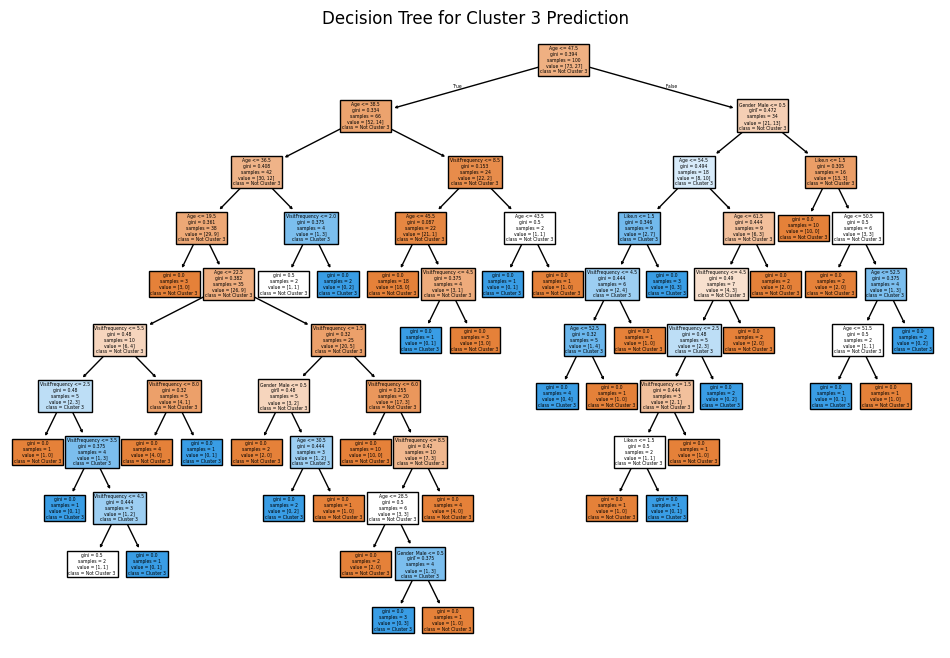

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

# Sample data creation (replace this with your actual DataFrame)
# mcdonalds = pd.read_csv('your_mcdonalds_data.csv')  # Uncomment and load your actual data
# For demonstration, let's create a sample DataFrame with dummy data
# Ensure that you have a DataFrame called 'mcdonalds' with appropriate columns

# Example columns for demonstration
data = {
    'Like.n': np.random.choice([0, 1, 2], size=100),  # Example response variable
    'Age': np.random.randint(18, 65, size=100),  # Sample ages
    'VisitFrequency': np.random.randint(1, 10, size=100),  # Example visit frequency
    'Gender': np.random.choice(['Male', 'Female'], size=100)  # Example gender data
}
mcdonalds = pd.DataFrame(data)

# Assuming k4 has been defined and has the same length as mcdonalds DataFrame
k4 = np.random.choice([1, 2, 3], size=100)  # Sample cluster labels (1, 2, or 3)

# Step 1: Prepare the dataset
# Convert the k4 labels to a binary outcome for classification (for example, check if k4 is 3)
mcdonalds['Target'] = (k4 == 3).astype(int)  # 1 if k4 is 3, else 0

# Step 2: Define features and target variable
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
y = mcdonalds['Target']

# Convert categorical variable 'Gender' to numerical
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Step 3: Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X, y)

# Step 4: Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title('Decision Tree for Cluster 3 Prediction')
plt.show()


In [54]:
import pandas as pd
import numpy as np

# Sample data creation (replace this with your actual DataFrame)
# mcdonalds = pd.read_csv('your_mcdonalds_data.csv')  # Uncomment and load your actual data
# For demonstration, let's create a sample DataFrame with dummy data
# Ensure that you have a DataFrame called 'mcdonalds' with appropriate columns

# Example columns for demonstration
data = {
    'VisitFrequency': np.random.randint(1, 10, size=100),  # Sample visit frequency
}
mcdonalds = pd.DataFrame(data)

# For demonstration, let's create k4 with cluster labels
k4 = np.random.choice([1, 2, 3, 4], size=100)  # Sample cluster labels (1, 2, 3, 4)

# Add the k4 cluster labels to the DataFrame
mcdonalds['Cluster'] = k4

# Step 1: Calculate the mean VisitFrequency for each cluster in k4
visit_means = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()

# Step 2: Convert the result to a numeric format
visit = visit_means.reset_index()
visit.columns = ['Cluster', 'MeanVisitFrequency']  # Rename columns for clarity

# Print the results
print(visit)


   Cluster  MeanVisitFrequency
0        1            5.500000
1        2            4.227273
2        3            5.714286
3        4            5.380952


In [55]:
import pandas as pd
import numpy as np

# Sample data creation (replace this with your actual DataFrame)
# mcdonalds = pd.read_csv('your_mcdonalds_data.csv')  # Uncomment and load your actual data
# For demonstration, let's create a sample DataFrame with dummy data
# Ensure that you have a DataFrame called 'mcdonalds' with appropriate columns

# Example columns for demonstration
data = {
    'Like.n': np.random.uniform(-5, 5, size=100),  # Random values for Like.n
    'VisitFrequency': np.random.randint(1, 10, size=100),  # Sample visit frequency
}
mcdonalds = pd.DataFrame(data)

# For demonstration, let's create k4 with cluster labels
k4 = np.random.choice([1, 2, 3, 4], size=100)  # Sample cluster labels (1, 2, 3, 4)

# Add the k4 cluster labels to the DataFrame
mcdonalds['Cluster'] = k4

# Step 1: Calculate the mean Like.n for each cluster in k4
like_means = mcdonalds.groupby('Cluster')['Like.n'].mean()

# Step 2: Convert the result to a numeric format
like = like_means.reset_index()
like.columns = ['Cluster', 'MeanLike']  # Rename columns for clarity

# Print the results
print(like)


   Cluster  MeanLike
0        1 -0.262977
1        2 -0.778993
2        3 -0.187962
3        4 -1.564106


In [56]:
import pandas as pd
import numpy as np

# Sample data creation (replace this with your actual DataFrame)
# mcdonalds = pd.read_csv('your_mcdonalds_data.csv')  # Uncomment and load your actual data
# For demonstration, let's create a sample DataFrame with dummy data
data = {
    'Gender': np.random.choice(['Female', 'Male'], size=100),  # Randomly assign genders
}
mcdonalds = pd.DataFrame(data)

# For demonstration, let's create k4 with cluster labels
k4 = np.random.choice([1, 2, 3, 4], size=100)  # Sample cluster labels (1, 2, 3, 4)

# Add the k4 cluster labels to the DataFrame
mcdonalds['Cluster'] = k4

# Step 1: Create a new column for Female indicator (1 if Female, 0 if Male)
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Step 2: Calculate the mean of Female indicator for each cluster in k4
female_means = mcdonalds.groupby('Cluster')['Female'].mean()

# Step 3: Convert the result to a numeric format
female = female_means.reset_index()
female.columns = ['Cluster', 'MeanFemale']  # Rename columns for clarity

# Print the results
print(female)


   Cluster  MeanFemale
0        1    0.407407
1        2    0.478261
2        3    0.562500
3        4    0.388889


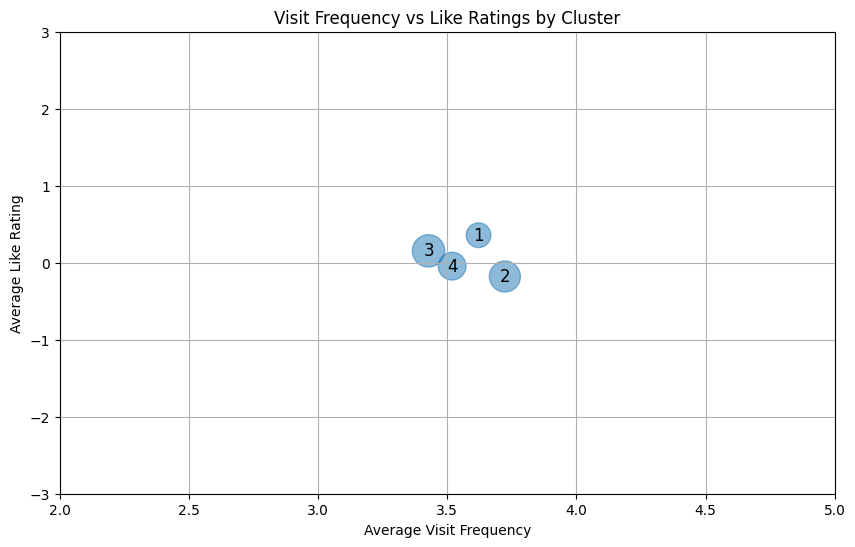

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual DataFrame)
# mcdonalds = pd.read_csv('your_mcdonalds_data.csv')  # Uncomment and load your actual data

# For demonstration, let's create a sample DataFrame with dummy data
np.random.seed(0)  # For reproducible results
data = {
    'Like.n': np.random.normal(0, 1, 100),  # Simulated like ratings
    'Age': np.random.randint(18, 60, size=100),  # Random ages between 18 and 60
    'VisitFrequency': np.random.uniform(2, 5, size=100),  # Random visit frequencies
    'Gender': np.random.choice(['Female', 'Male'], size=100),  # Randomly assign genders
}
mcdonalds = pd.DataFrame(data)

# For demonstration, let's create k4 with cluster labels
k4 = np.random.choice([1, 2, 3, 4], size=100)  # Sample cluster labels (1, 2, 3, 4)
mcdonalds['Cluster'] = k4

# Step 1: Calculate visit means
visit = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()
visit = visit.reset_index()  # Reset index to convert Series to DataFrame
visit.columns = ['Cluster', 'MeanVisitFrequency']  # Rename columns for clarity

# Step 2: Calculate like means
like = mcdonalds.groupby('Cluster')['Like.n'].mean()
like = like.reset_index()  # Reset index to convert Series to DataFrame
like.columns = ['Cluster', 'MeanLike']  # Rename columns for clarity

# Step 3: Calculate female proportions
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)
female = mcdonalds.groupby('Cluster')['Female'].mean()
female = female.reset_index()  # Reset index to convert Series to DataFrame
female.columns = ['Cluster', 'MeanFemale']  # Rename columns for clarity

# Step 4: Merge the dataframes on 'Cluster'
summary_df = pd.merge(visit, like, on='Cluster')
summary_df = pd.merge(summary_df, female, on='Cluster')

# Step 5: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['MeanVisitFrequency'], summary_df['MeanLike'],
            s=10 * summary_df['MeanFemale'] * 100, alpha=0.5)  # s determines the size of points
plt.xlim(2, 5)  # Adjust x limits based on your visit frequency range
plt.ylim(-3, 3)  # Adjust y limits based on your like rating range

# Step 6: Annotate the clusters
for i in range(len(summary_df)):
    plt.text(summary_df['MeanVisitFrequency'].iloc[i], summary_df['MeanLike'].iloc[i],
             str(summary_df['Cluster'].iloc[i]), fontsize=12, ha='center', va='center')

# Step 7: Set labels and title
plt.title('Visit Frequency vs Like Ratings by Cluster')
plt.xlabel('Average Visit Frequency')
plt.ylabel('Average Like Rating')
plt.grid(True)

# Step 8: Show the plot
plt.show()
